# Práctica 1, exploración de datos
### Exploración inicial de los conjuntos de datos de la tarea 04
##### Alberto Isaac Pico Lara

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly
import missingno as msno
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',500)

### Conjunto de datos de los precios de mercado de las principales criptomonedas
[https://www.kaggle.com/philmohun/cryptocurrency-financial-data]

In [2]:
df_crypto = pd.read_csv('..\Conjuntos de datos\consolidated_coin_data.csv', sep = ',', encoding = 'utf8')

In [3]:
df_crypto.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667","879,181,680"


In [4]:
df_crypto.tail()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0,"58,287,979"
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0,"65,604,596"
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0,"74,020,918"
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0,"75,388,964"
28943,bitcoin-sv,"Apr 28, 2013",4.30,4.40,4.18,4.35,0,"74,636,938"


In [5]:
df_crypto.shape

(28944, 8)

In [6]:
columnas = df_crypto.columns.values.tolist()
columnas

['Currency', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [7]:
df_crypto.dtypes

Currency      object
Date          object
Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap    object
dtype: object

In [8]:
df_crypto['Volume'] = df_crypto['Volume'].str.replace(',', '')
df_crypto['Market Cap'] = df_crypto['Market Cap'].str.replace(',', '')
df_crypto['Open'] = df_crypto['Open'].str.replace(',', '')
df_crypto['High'] = df_crypto['High'].str.replace(',', '')
df_crypto['Low'] = df_crypto['Low'].str.replace(',', '')
df_crypto['Close'] = df_crypto['Close'].str.replace(',', '')

In [9]:
df_crypto.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752,824588509
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224,853213342
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097,817872179
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567,828296390
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667,879181680


In [10]:
columnas_numericas = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [11]:
df_crypto[columnas_numericas] = df_crypto[columnas_numericas].astype(float)

In [12]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  float64
 3   High        28944 non-null  float64
 4   Low         28944 non-null  float64
 5   Close       28944 non-null  float64
 6   Volume      28944 non-null  float64
 7   Market Cap  28944 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.8+ MB


In [13]:
df_crypto.isnull().any().any()

False

In [14]:
df_crypto.replace({' ': np.nan}, inplace = True)

In [15]:
df_crypto.isnull().any().any()

False

In [16]:
list(df_crypto['Currency'].unique())

['tezos',
 'binance-coin',
 'eos',
 'bitcoin',
 'tether',
 'xrp',
 'bitcoin-cash',
 'stellar',
 'litecoin',
 'ethereum',
 'cardano',
 'bitcoin-sv']

In [17]:
df_crypto.groupby('Currency').count()

,Date,Open,High,Low,Close,Volume,Market Cap
Currency,,,,,,,
binance-coin,2412,2412,2412,2412,2412,2412,2412
bitcoin,2412,2412,2412,2412,2412,2412,2412
bitcoin-cash,2412,2412,2412,2412,2412,2412,2412
bitcoin-sv,2412,2412,2412,2412,2412,2412,2412
cardano,2412,2412,2412,2412,2412,2412,2412
eos,2412,2412,2412,2412,2412,2412,2412
ethereum,2412,2412,2412,2412,2412,2412,2412
litecoin,2412,2412,2412,2412,2412,2412,2412
stellar,2412,2412,2412,2412,2412,2412,2412


## El interés de la exploración se centrará en Bitcoin y XRP

In [18]:
solo_xrp = df_crypto[df_crypto['Currency'] == 'xrp']
solo_xrp.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
12060,xrp,"Dec 04, 2019",0.219824,0.221770,0.212603,0.216348,1.427313e+09,9.364746e+09
12061,xrp,"Dec 03, 2019",0.219516,0.223179,0.216675,0.219870,1.017648e+09,9.517202e+09
12062,xrp,"Dec 02, 2019",0.225386,0.227203,0.217283,0.219581,1.187514e+09,9.507819e+09
12063,xrp,"Dec 01, 2019",0.226466,0.226525,0.220253,0.225333,1.176237e+09,9.756884e+09
12064,xrp,"Nov 30, 2019",0.230232,0.233615,0.224546,0.226474,1.160033e+09,9.806316e+09


In [19]:
solo_bitcoin = df_crypto[df_crypto['Currency']  == 'bitcoin']
solo_bitcoin.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
7236,bitcoin,"Dec 04, 2019",7320.13,7539.78,7170.92,7252.03,2.166424e+10,1.311431e+11
7237,bitcoin,"Dec 03, 2019",7323.98,7418.86,7229.36,7320.15,1.479749e+10,1.323599e+11
7238,bitcoin,"Dec 02, 2019",7424.04,7474.82,7233.40,7321.99,1.708204e+10,1.323790e+11
7239,bitcoin,"Dec 01, 2019",7571.62,7571.62,7291.34,7424.29,1.872071e+10,1.342151e+11
7240,bitcoin,"Nov 30, 2019",7764.06,7836.10,7515.85,7569.63,1.715819e+10,1.368294e+11


In [20]:
solo_xrp.describe()

,Open,High,Low,Close,Volume,Market Cap
count,2412.000000,2412.000000,2412.000000,2412.000000,2.412000e+03,2.412000e+03
mean,4.543878,4.685341,4.348475,4.529477,3.488055e+08,7.187689e+09
std,21.413655,22.041272,20.522550,21.338320,7.945734e+08,1.238343e+10
min,0.002809,0.003082,0.002802,0.002810,0.000000e+00,2.196991e+07
25%,0.006635,0.006768,0.006494,0.006636,2.866185e+05,2.101734e+08
50%,0.015809,0.016265,0.015035,0.015880,1.344320e+06,3.405986e+08
75%,0.315354,0.322414,0.308677,0.316083,3.464355e+08,1.246289e+10
max,144.000000,147.490000,134.050000,144.540000,9.415068e+09,1.308535e+11


In [21]:
solo_bitcoin.describe()

,Open,High,Low,Close,Volume,Market Cap
count,2412.000000,2412.000000,2412.000000,2412.000000,2.412000e+03,2.412000e+03
mean,3020.633201,3104.114502,2929.820933,3023.498777,3.599158e+09,5.139971e+10
std,3769.932535,3892.375562,3626.164299,3770.438284,6.547223e+09,6.566303e+10
min,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.784112e+08
25%,375.125000,382.982500,367.927500,375.312500,2.219488e+07,5.140122e+09
50%,700.455000,713.555000,670.650000,701.945000,8.518790e+07,1.031777e+10
75%,5749.572500,5868.590000,5567.715000,5756.890000,4.655770e+09,9.833698e+10
max,19475.800000,20089.000000,18974.100000,19497.400000,4.510573e+10,3.265025e+11


### Visualización

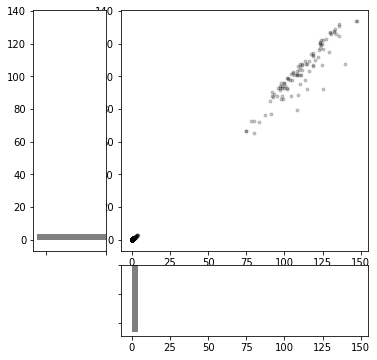

In [22]:
x1 = solo_xrp['High']
y1 = solo_xrp['Low']
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
main_ax.plot(x1, y1, 'ok', markersize=3, alpha=0.2)
x_hist.hist(x1, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y1, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

In [23]:
solo_xrp.shape

(2412, 8)

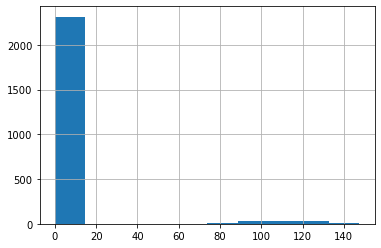

In [24]:
solo_xrp['High'].hist()

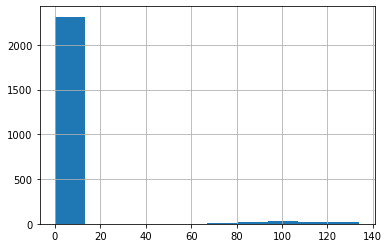

In [25]:
solo_xrp['Low'].hist()

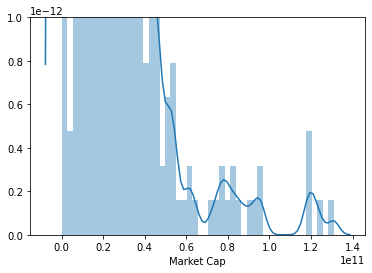

In [26]:
sns.distplot(solo_xrp['Market Cap'])

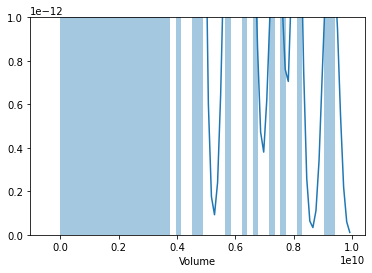

In [27]:
sns.distplot(solo_xrp['Volume'])

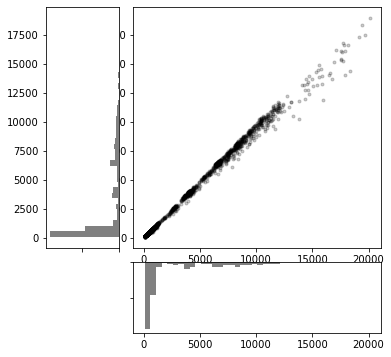

In [28]:
x2 = solo_bitcoin['High']
y2 = solo_bitcoin['Low']
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
main_ax.plot(x2, y2, 'ok', markersize=3, alpha=0.2)
x_hist.hist(x2, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y2, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

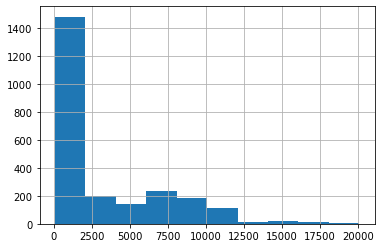

In [29]:
solo_bitcoin['High'].hist()

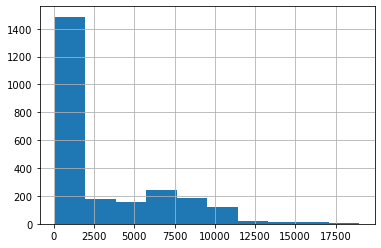

In [30]:
solo_bitcoin['Low'].hist()

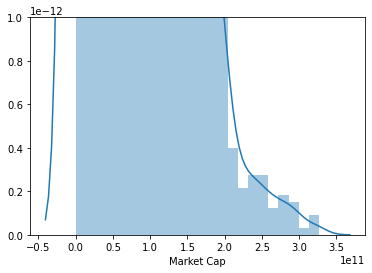

In [31]:
sns.distplot(solo_bitcoin['Market Cap'])

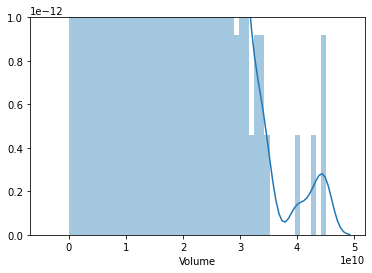

In [32]:
sns.distplot(solo_bitcoin['Volume'])

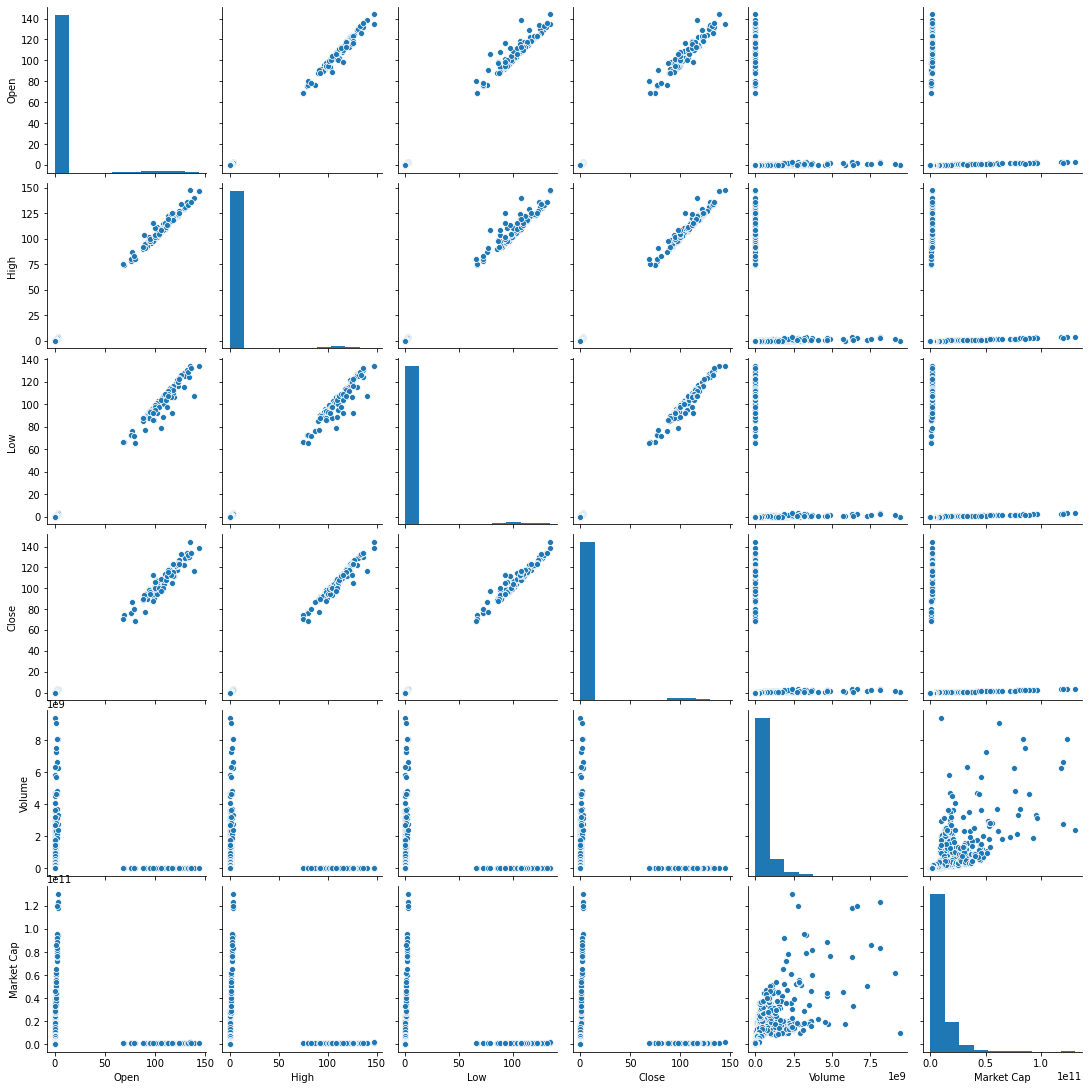

In [81]:
sns.pairplot(solo_xrp[columnas_numericas])

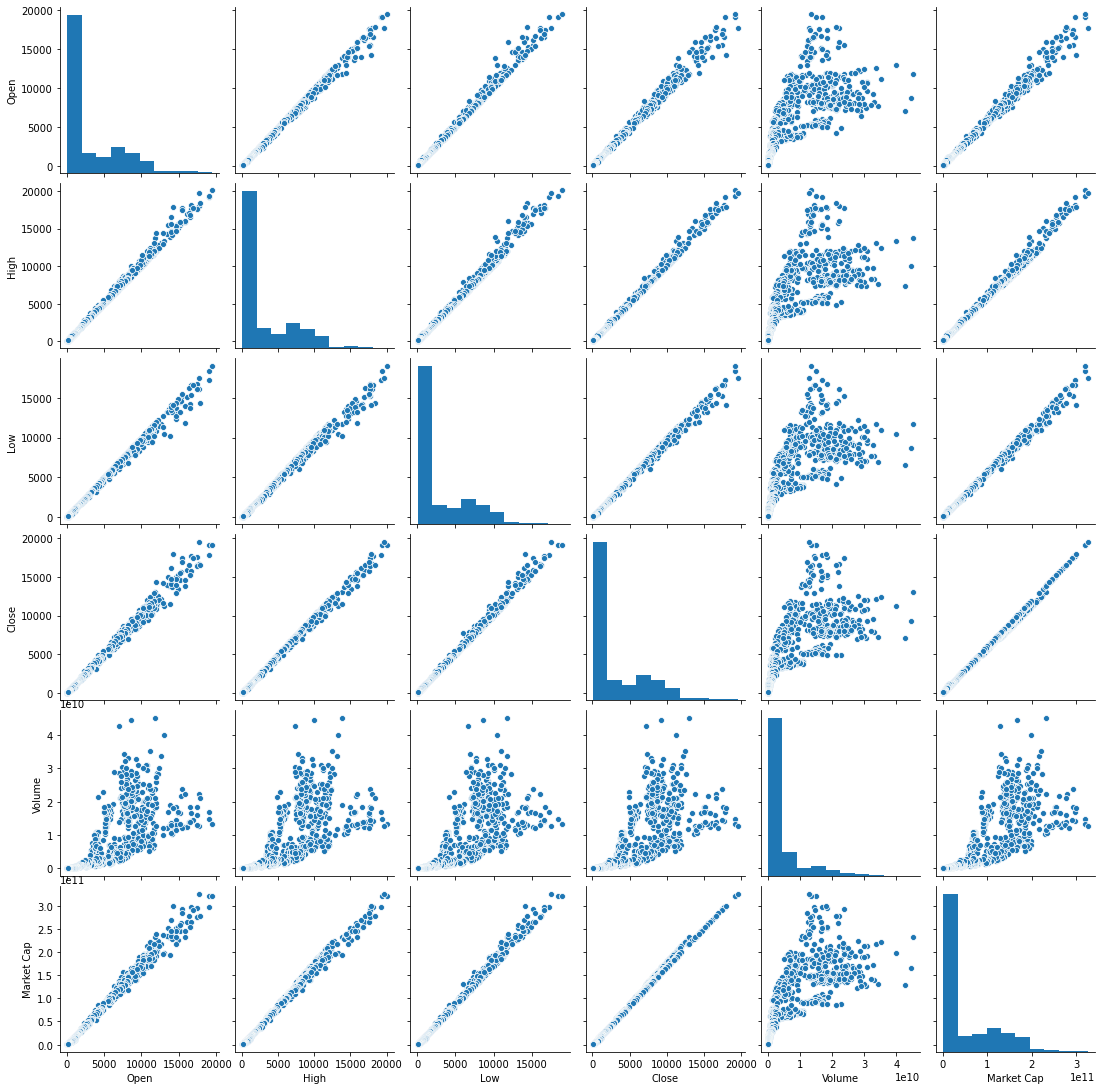

In [79]:
sns.pairplot(solo_bitcoin[columnas_numericas])

### Conjunto de datos sobre la temperatura del aire

In [33]:
df_temp = pd.read_csv("..\Conjuntos de datos\TEMPAIRE_HORA.csv", sep = ',', encoding = 'utf8')

In [34]:
df_temp.head()

,estacionid,fecha,tempaire
0,ABASOLO,2020/07/24 00:00:00,27.5
1,ABASOLO,2020/07/24 01:00:00,27.2
2,ABASOLO,2020/07/24 02:00:00,26.9
3,ABASOLO,2020/07/24 03:00:00,26.4
4,ABASOLO,2020/07/24 04:00:00,25.9


In [35]:
df_temp.shape

(17052, 3)

In [36]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17052 entries, 0 to 17051
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estacionid  17052 non-null  object 
 1   fecha       17052 non-null  object 
 2   tempaire    17052 non-null  float64
dtypes: float64(1), object(2)
memory usage: 399.8+ KB


In [37]:
df_temp.isnull().any().any()

False

In [38]:
df_temp.replace({' ': np.nan}, inplace = True)

In [39]:
df_temp.replace({'0': np.nan}, inplace = True)

In [40]:
df_temp.replace({0: np.nan}, inplace = True)

In [41]:
list(df_temp['estacionid'].unique())

['ABASOLO',
 'ACAPONETA',
 'ACUGR',
 'AHUALULCOTP',
 'ALTZOMONI',
 'AM2DR',
 'ANGMC',
 'ARGOVIA',
 'ATOYAC',
 'BAABN',
 'BAHIAKINO',
 'BARRETALI',
 'BARRETALII',
 'BASCH',
 'BLORETO',
 'BOCADELRIO',
 'BOCHIL',
 'BTORDO',
 'CABORCA',
 'CALVILLO',
 'CANCUC',
 'CANDIDOAG',
 'CATARINITAS',
 'CATAVINA',
 'CBIDF',
 'CDCCA',
 'CDCUAUHTEMOC',
 'CDEMTYI',
 'CDVALLES',
 'CELYC',
 'CHACAMAX',
 'CHAJL',
 'CHAMELA',
 'CHAYABE',
 'CHICH',
 'CHNCH',
 'CNCQR',
 'CO2QR',
 'COLINA',
 'CONST1857',
 'COSCOMATEPEC',
 'CUXTEPEQUES',
 'DELICIAS',
 'ECOGUARDAS',
 'ELCHICO',
 'ELDIENTE',
 'ELTRIUNFO',
 'ENCRUCIJADA',
 'ESCALONCP',
 'ESCARCEGA',
 'ESCUINTLA',
 'FD2TP',
 'FIMADERO',
 'GAVIOTAS',
 'GCCCH',
 'GOGORRON',
 'HGRANERO',
 'HUEHD',
 'HUIXTAN',
 'HUIXTLA',
 'ILRAYON',
 'IMTMR',
 'IXTLANRIO',
 'IZUPB',
 'JAMAPA',
 'JANOS',
 'JAUMAVE',
 'JIMENEZ2CHIH',
 'JIMENEZCHIH',
 'JMORELOS',
 'JOCJL',
 'KANTUNILKIN',
 'LACVC',
 'LAENCANTADA',
 'LAENCRUCIJADA',
 'LAFLOR',
 'LAPRIMAVERA',
 'LARRAINZAR',
 'LASFLORESII',

In [42]:
len(list(df_temp['estacionid'].unique()))

182

In [43]:
def transformar_fecha(x):
    x = x[:10]
    x = x.replace('/', '-')
    return x

In [44]:
def tranformar_hora(x):
    x = x[11:]
    return x

In [45]:
df_temp['solo_fecha'] = df_temp['fecha'].map(transformar_fecha)

In [46]:
df_temp['solo_hora'] = df_temp['fecha'].map(tranformar_hora)

In [47]:
df_temp.head()

,estacionid,fecha,tempaire,solo_fecha,solo_hora
0,ABASOLO,2020/07/24 00:00:00,27.5,2020-07-24,00:00:00
1,ABASOLO,2020/07/24 01:00:00,27.2,2020-07-24,01:00:00
2,ABASOLO,2020/07/24 02:00:00,26.9,2020-07-24,02:00:00
3,ABASOLO,2020/07/24 03:00:00,26.4,2020-07-24,03:00:00
4,ABASOLO,2020/07/24 04:00:00,25.9,2020-07-24,04:00:00


In [48]:
df_temp['solo_fecha']=pd.to_datetime(df_temp['solo_fecha'])
df_temp['año']  = df_temp['solo_fecha'].map(lambda x:x.year)
df_temp['mes']  = df_temp['solo_fecha'].map(lambda x:x.month)
df_temp['día']  = df_temp['solo_fecha'].map(lambda x:x.day)

In [54]:
df_temp.head()

,estacionid,fecha,tempaire,solo_fecha,solo_hora,año,mes,día
0,ABASOLO,2020/07/24 00:00:00,27.5,2020-07-24,0,2020,7,24
1,ABASOLO,2020/07/24 01:00:00,27.2,2020-07-24,1,2020,7,24
2,ABASOLO,2020/07/24 02:00:00,26.9,2020-07-24,2,2020,7,24
3,ABASOLO,2020/07/24 03:00:00,26.4,2020-07-24,3,2020,7,24
4,ABASOLO,2020/07/24 04:00:00,25.9,2020-07-24,4,2020,7,24


In [50]:
len(list(df_temp['solo_fecha'].unique()))

1

In [53]:
df_temp['solo_hora'] = df_temp['solo_hora'].map(lambda x:int(x[:2]))

In [55]:
len(list(df_temp['solo_hora'].unique()))

24

In [57]:
df_temp['tempaire'].describe()

count    17052.000000
mean        24.117495
std          7.513135
min          1.800000
25%         19.000000
50%         24.800000
75%         29.700000
max         59.600000
Name: tempaire, dtype: float64

In [63]:
df_temp.groupby('estacionid').count()

,fecha,tempaire,solo_fecha,solo_hora,año,mes,día
estacionid,,,,,,,
ABASOLO,19,19,19,19,19,19,19
ACAPONETA,108,108,108,108,108,108,108
ACUGR,113,113,113,113,113,113,113
AHUALULCOTP,19,19,19,19,19,19,19
ALTZOMONI,109,109,109,109,109,109,109
...,...,...,...,...,...,...,...
VILLAOCAMPO,110,110,110,110,110,110,110
VTACANA,41,41,41,41,41,41,41
YC2SO,106,106,106,106,106,106,106


In [64]:
y = df_temp['tempaire']
x = df_temp['solo_hora']

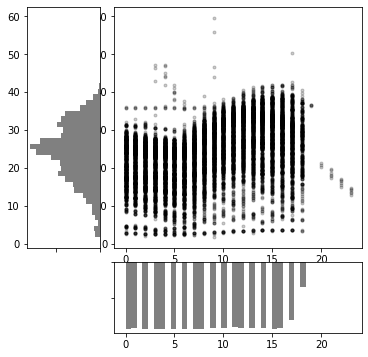

In [65]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

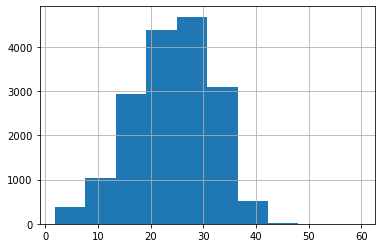

In [66]:
df_temp['tempaire'].hist()

Text(0, 0.5, 'temperatura del aire')

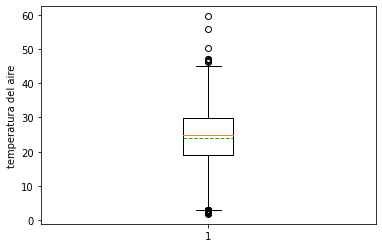

In [67]:
plt.boxplot(df_temp['tempaire'], showmeans=True, meanline=True)
plt.ylabel('temperatura del aire')

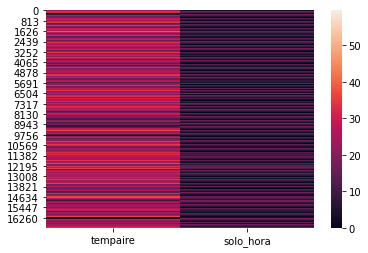

In [69]:
sns.heatmap(df_temp[['tempaire', 'solo_hora']])

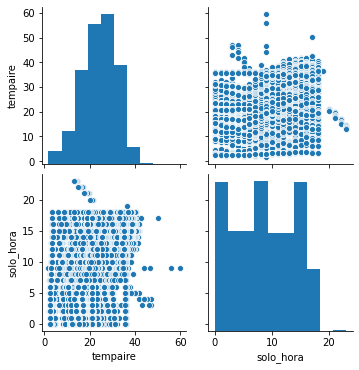

In [75]:
g = sns.pairplot(df_temp[['tempaire', 'solo_hora']])

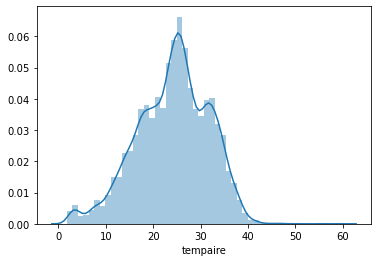

In [77]:
sns.distplot(df_temp['tempaire'])